<a id="regression"></a>
# Regression


**In short: learn (continous) functional mapping between input variable and output variable(s).**

<a href="https://i1.wp.com/www.number-generator.com/wp-content/uploads/2017/02/housing_prices_linear-1.png?resize=550%2C390"><img src="https://drive.google.com/uc?export=view&id=1Asul1TJZLu2bMQybx5ZpoyYDaRtEMboV"></a>


[source](http://www.number-generator.com/knowledge-center/statistical-modelling/)

Or more realistic:

<a href="https://cdn-images-1.medium.com/max/1000/1*Zm2Hu724W6UQCVWWQe7afg.jpeg"><img src="https://drive.google.com/uc?export=view&id=1EuACkcNmSSGdYtdSNVlzrOHp0O73-G-B"></a>

[source](https://medium.com/@datalesdatales/predicting-house-prices-with-linear-regression-595422992c48)

[data](https://www.kaggle.com/harlfoxem/housesalesprediction)


## Formally

- Looking for systematic connections (functions) between variables
- In **univariate case**: only **one dependent variable** but there **may be multiple independent** variables $x_1$...$x_n$
$$ y = f(x_1, x_2, ..., x_p) + \epsilon $$

- where $\epsilon$ is an independently distributed error term 

- Subclass: **linear regression**, when we work with (assume) a linear relationship between the variables
$$ f(x_1, x_2, ..., x_p) = \beta_0 + \sum_{j=1}^px_j\beta_j $$
  - $\beta_0$ is the **constant** or **intercept** and signifies the crossing point of the line with the y-axis at $f(x)=0$
  - It can easily be included as  $x_0=1$, resulting in:
  $$ y= \sum_{j=0}^px_j\beta_j + \epsilon $$
  - The **predicted value** of y is marked as "y hat":
  $$ \hat{y} = \beta_0 + \sum_{j=1}^px_j\beta_j $$


## Nomenclature

- **Simple linear regression**: one "explanatory variable" $x$ and one scalar variable $y$ as target.

- **Multiple linear regression**: two or more explantory variables: $x_1,x_2, ... , x_p$
- Can be also written in vector form: $y=x^T\beta + \epsilon$, where $x$ and $\beta$ are also vectors.

- **General linear regression, multivariate linear regression**: $y$ is not a scalar but a vector 

- **Generalized linear model**: special circumstances  given for $y$, e.g.: it is bounded, it is a categorical variable, etc. 
  - In this case we use a *link function* to transform the variables.
  - Known examples: logistic regression (which _confusingly_ solves a classification problem!!), Poisson regression (for frequency data),...

- **Hierarchic linear regression**: adding and removing variables from model

- **Bayes regression**: the coefficients are treated as probabilistic variables and prior probabilitiy models can be attached to them, maximum likelihood estimates are usually calculated 



## How do we learn the model?
- The basic model does not give any constraints and does not define the $\beta_i$'s
- We have to **find it out by minimizing a loss** (-> measure how far away our predictions are from the "actual" targets, and minimize these distances)
- To minimize a loss we need some form of **norm**
- A norm is a measurement of the **distance** of the actual values to the estimated values provided by the estimated function 

> A typical loss function: squared error.

- We need a way of finding the parameters which give the best results according to the chosen loss function.


### Analytic vs. non-analytic way of finding the best model parameters

* analytic: ~ calculation using a **formula**
  * deterministic
  * finds the global optimum
  * is computationally expensive
  * may break down (e.g., with highly correlated features, or when we have less samples than features)

* non-analytic: most typically **gradient descent** (GD)
  * approximation, not deterministic
  * may find local optima
  * iterative process with a learning rate parameter
  * computationally less expensive
  * works well even with a large number of features


### Sums of squares

$$\text{Total} = \text{Explained} + \text{Residual}$$



##### RSS = residual sum of squares

- One such norm and thus way of measuring loss is **RSS = residual sum of squares** (also called sum of squares error, SSE):
$$\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

<a href="http://www.rossmanchance.com/wsf/solutions/inclass/010-1n.gif"><img src="https://drive.google.com/uc?export=view&id=1_VDWZaYDU2UBNFP0IqO48oTJU01CEe2n"></a>

- In this case we have an explicit method to solve the problem:

$$ \mathbf \beta = (X^TX)^{-1}X^T \mathbf y$$

> Residual sum of squares is a **measure of the discrepancy between the data and the predictions**. The smaller, the better.


##### Regression sum of squares

- Alternative measure of "precision of regression": **RegSS - regression sum of squares** (also called **ESS, explained sum of squares**):
$$RegSS = TSS - RSS$$ with **TSS** being the **total variance of the response variable**
$$TSS = \sum_{i=1}^n(y_i-\overline{y}_i)^2$$
  - where $\overline{y}$ is the *mean* of the response variable

  > **TSS (or SST)** is the variance of the entire dataset (independent of any predictions we make).


- RegSS shows the **amount of variance which has been explained through the regression** (rather than the unexplained amount).

  > The closer this explained sum of squares value is to TSS, the better.

<a href="https://learnche.org/pid/_images/ANOVA-graphically.png"><img src="https://drive.google.com/uc?export=view&id=1WTTnpBHhpwiZ4VCR9tQJo8_ImX-ZL9fE" width=400 heigth=400></a>


[This is an easy to understand an overview of the three sums of squares (total, regression, error/residual)](https://365datascience.com/tutorials/statistics-tutorials/sum-squares/)

### Assumptions for squared loss linear regression

For **squared loss linear regression** to provide unbiased results some assumptions have to hold:
- No [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity), that is, explanatory variables should be linearly independent.
- The error term is [homoscedastic](https://en.wikipedia.org/wiki/Homoscedasticity) (constant variance) and has no autocorrelation and is normally distributed


(Scikit/Scipy even has tests for these assumptions.)

## How good is it? - "Robust regression"

**Squared error** can easily skew the fit!

Outliers have **"high leverage"** in a linear model, particularly with a squared loss optimization target.

"**High-leverage points**: observations at extreme or outlying values" [(Wikipedia)](https://en.wikipedia.org/wiki/Leverage_(statistics))

### y-outlier

<a href="http://drive.google.com/uc?export=view&id=1xKXZVYM-WCxQMYRhcIPYq7N_E84YhRqq"><img src="https://drive.google.com/uc?export=view&id=1UN1FXRtEE68tlOiK4hdJCqj8k7eFjp_r"></a>


### x-outlier

<a href="http://drive.google.com/uc?export=view&id=1Qrsu8zK-JH8Vx1mT-KMNUTpoqEVBb0L_"><img src="https://drive.google.com/uc?export=view&id=1rpXaHx4LWjsNBZtTIlLpG2w0RHOqQ_Mg"></a>


### Demonstration

In [ ]:
# The imports and preliminaries we'll need.
# Let us do this in one go...

import warnings
warnings.filterwarnings('ignore')
# Now this is NOT best practice, but in many cases, we have to present the notebook,
# so we wouldn't like to have big red warnings all over the place...

import os
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, explained_variance_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn import datasets

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


plt.rcParams['figure.figsize'] = 15, 8

In [ ]:
def generate_data(t, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
    '''Generate sample.'''
    y = A * np.exp(-sigma * t) * np.sin(omega * t)
    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] = 10

    return y + error

In [ ]:
t_min = 0
t_max = 30

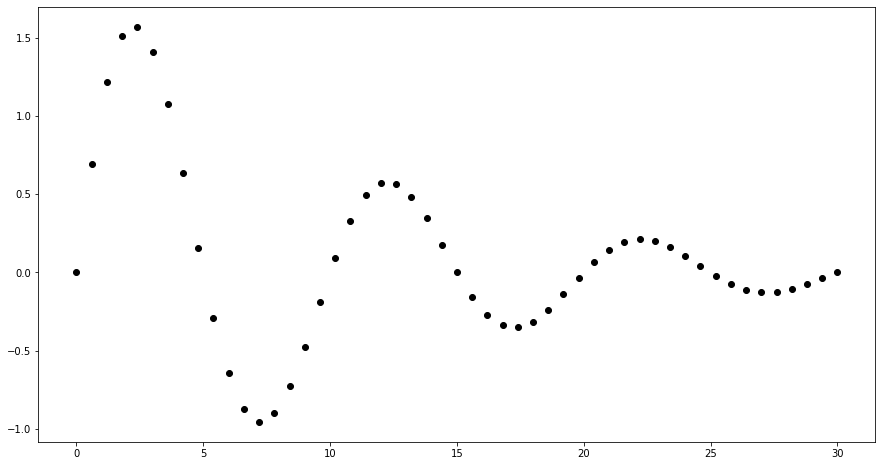

In [ ]:
X = np.linspace(t_min, t_max, 51)
y = generate_data(X, A=2, sigma=0.1, omega=0.1 * 2 * np.pi, noise=0, n_outliers=0)

# Plot outputs
plt.scatter(X, y,  color='black')
plt.show()

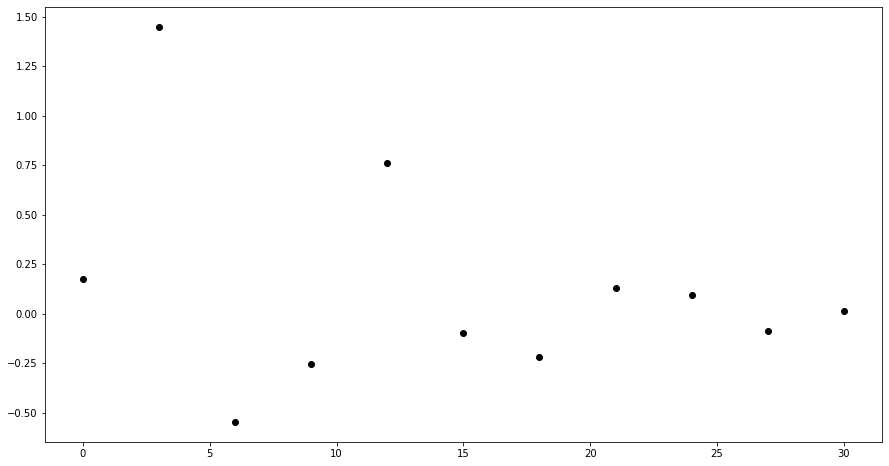

In [ ]:
X = np.linspace(t_min, t_max, 11)
y = generate_data(X, A=2, sigma=0.1, omega=0.1 * 2 * np.pi, noise=0.1, n_outliers=0)

# Plot outputs
plt.scatter(X, y,  color='black')
plt.show()

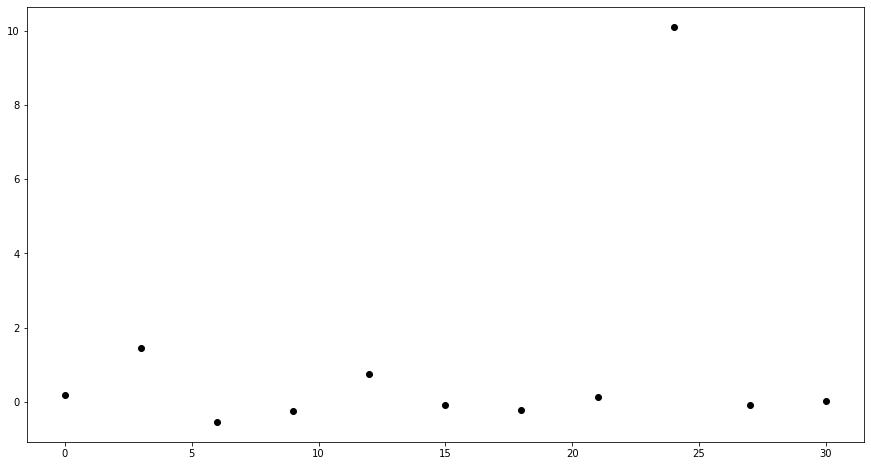

In [ ]:
X = np.linspace(t_min, t_max, 11)
y_outlier = generate_data(X, A=2, sigma=0.1, omega=0.1 * 2 * np.pi, noise=0.1, n_outliers=1)

# Plot outputs
plt.scatter(X, y_outlier,  color='black')
plt.show()

# so, finally finished data generation (with outliers)

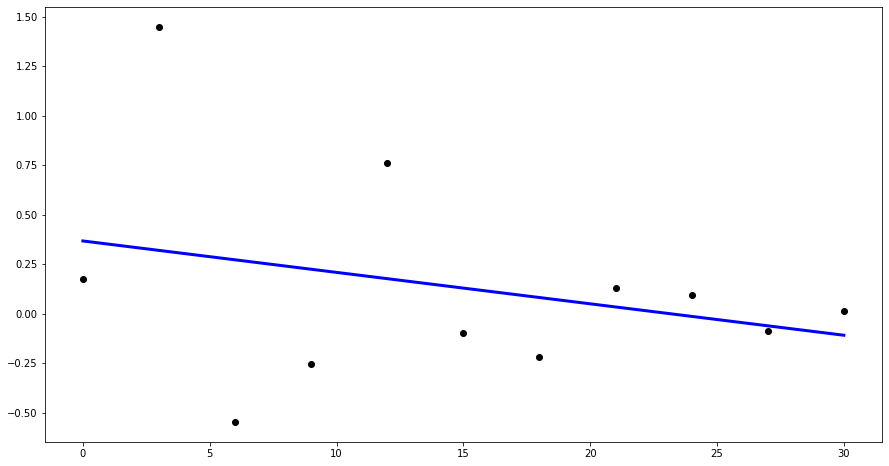

In [ ]:
# lin reg model
X=np.reshape(X, (-1, 1))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

y_pred = regr.predict(X)

# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)

plt.show()

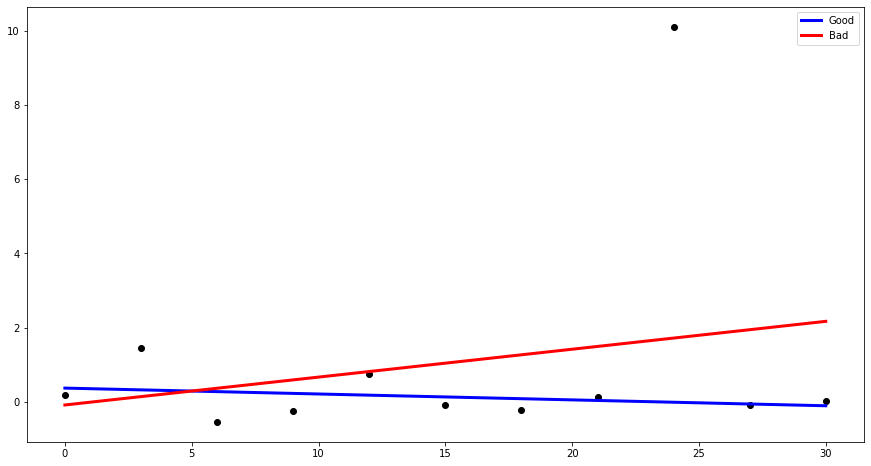

In [ ]:
# Create linear regression object with outlier
# BLue is the good, red is the bad regression result
regr_outlier = linear_model.LinearRegression()

# Train the model using the training sets
regr_outlier.fit(X, y_outlier)

y_outlier_pred = regr_outlier.predict(X)

# Plot outputs
plt.scatter(X, y_outlier,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.plot(X, y_outlier_pred, color='red', linewidth=3)
plt.legend(["Good","Bad"])

plt.show()

### Robust regression
- Making regression less sensitive to outliers
- An option: Loss from the modulus of simple distance ("absolute error")
$$\sum_{i=1}^n|y_i-\hat{y}_1|$$

- Another option: Huber regression
<a href="https://en.wikipedia.org/wiki/Huber_loss">
<a href="https://www.evergreeninnovations.co/blog-machine-learning-loss-functions/"><img src="https://drive.google.com/uc?export=download&id=1Xa1BoFsrB-Wz8HW9F6D8kTzKUnHYcdsX" height="300px" align="right"></a>

 - Optimizes for the sum of the two parts of error
$$\text{Huber loss}={\begin{cases}{\frac {1}{2}}(y-\hat{y})^{2}&{\textrm {for }}|y-\hat{y}|\leq \delta ,\\\delta \,(|y-\hat{y}|-{\frac {1}{2}}\delta )&{\textrm {otherwise.}}\end{cases}}$$

 - delta is a hyperparameter to be optimized
 - For **small differences**, error term is **quadratic**
 - For **large differences**, error term is **linear**


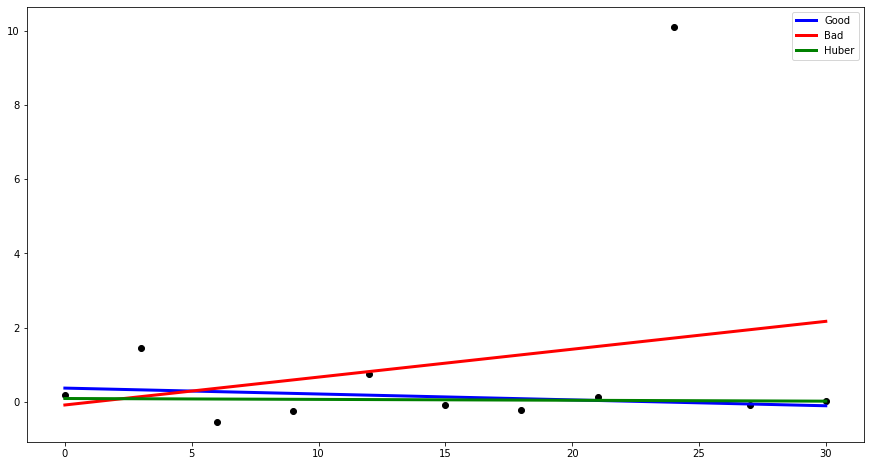

In [ ]:
# Create linear regression object for robust regression 
# Huber regression
regr_huber = linear_model.HuberRegressor()

# Train the model using the training sets
regr_huber.fit(X, y_outlier)

y_huber_pred = regr_huber.predict(X)

# Plot outputs
plt.scatter(X, y_outlier,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.plot(X, y_outlier_pred, color='red', linewidth=3)
plt.plot(X, y_huber_pred, color='green', linewidth=3)
plt.legend(["Good","Bad","Huber"])
plt.show()

## RANSAC (Random Sample Consensus) regression

- Robust method



- **Algorithm:**
    - Choose, at random, enough data points that are minimally sufficient for training the model
    - Call these inliers
    - Fit the model to inliers
    - Check, how well the model fits with the other points.
    - Points that fit, get added to consensus set.
    - The model is good if the consensus set is big enough.
    - The model can be enhanced with data in the consensus set


- We repeatedly run the above algorithm
- We stop if the consensus set is big enough

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


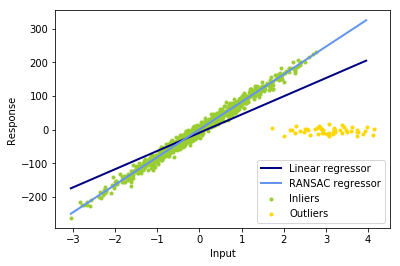

In [ ]:
n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

This method will be informative for us when we come to crossvalidation: the common pattern will be trying to ensure model robustness by subsampling the data.

## What if we go non-linear? (Polynomial regression)

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

Features used and their coefficients:
[('constant', 0.0), ('x', 3.0315657012657016), ('x^2', -1.285528080115578), ('x^3', 0.1372919902900498)] 



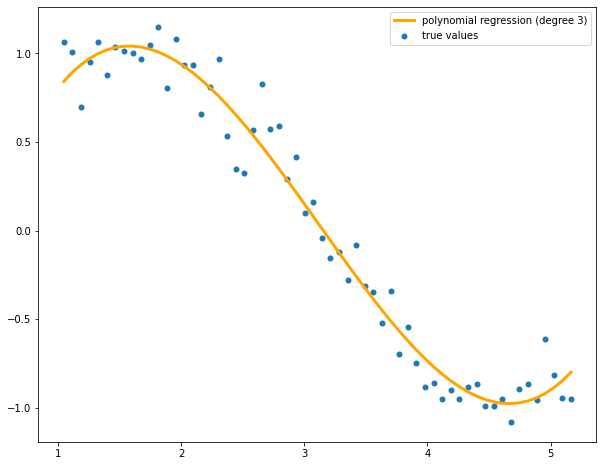

In [ ]:
from sklearn.preprocessing import PolynomialFeatures  ## to add polynomial features
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

degree = 3
## a sklearn pipeline: 1) add polynomial features; 2) linear regression on extended feature space
pipe = Pipeline(steps=[("poly_features", PolynomialFeatures(degree)),   ## first, generate polynomial features
                       ("regression", LinearRegression())]) ## next, run linear regression on extended feature space

pipe.fit(data[['x']],data['y'])

## the coefficients
coefs = pipe.named_steps["regression"].coef_

## the feature names
polyfeatures = pipe[:-1].get_feature_names_out()
polyfeatures[0] = "constant"

## feature name - coefficient pairs
names_and_coefs = [(polyfeatures[i], coefs[i]) for i, _ in enumerate(coefs)]
print("Features used and their coefficients:")
print(names_and_coefs, "\n")

## the predictions
y_pred = pipe.predict(data[["x"]])

## plot true values and predictions
plt.figure(figsize=(10,8))
plt.scatter(data['x'],data['y'],marker='.', s=100, label="true values")
plt.plot(data['x'],y_pred, c="orange", lw=3, label=f"polynomial regression (degree {degree})")
plt.legend()
plt.show()

Higher and higher degrees of polynomial features to use....

...more and more complex shapes and fit.

In [ ]:
# generates x till 15th power for polynomial fitting
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
#print(data.head())

In [ ]:
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = linear_model.LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

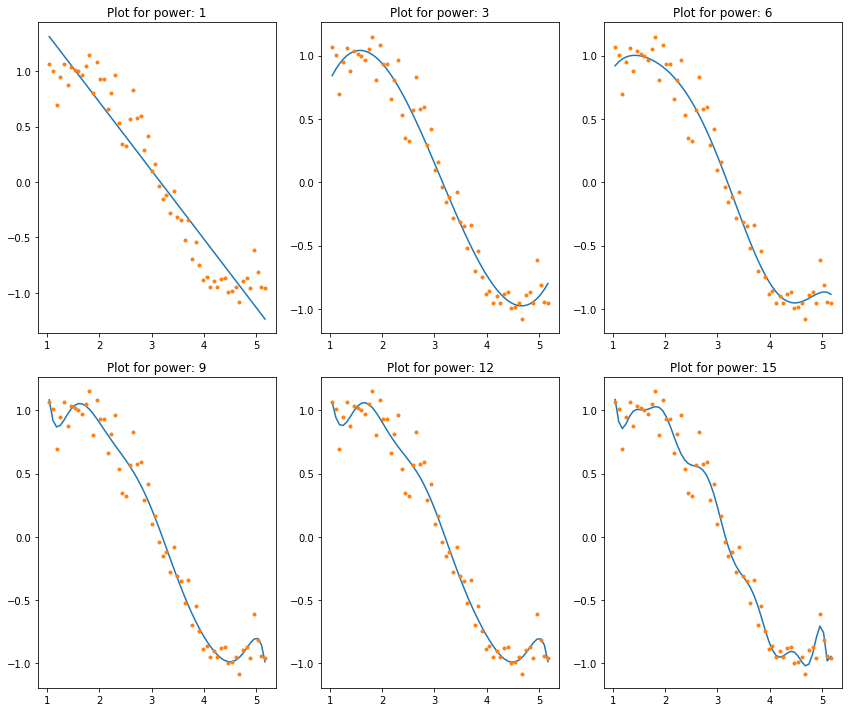

In [ ]:
#Initialize a dataframe to store the results:
# ploynomial fittings
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

**But wait, this won't be good!**

<a href="https://i.imgflip.com/2fxom7.jpg"><img src="https://drive.google.com/uc?export=view&id=1OANkaRL-6EIl9NQqAOkkCVPk4VtSItyS"></a>